In [1]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Utkarsh's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Load the dataset
dataset = pd.read_csv('BA_reviews.csv')

# Clean the text in the 'Review' column
dataset['Cleaned_Reviews'] = dataset['reviews'].apply(clean_text)

# Print the cleaned dataset
print(dataset.head())


[nltk_data] Downloading package punkt to C:\Users\Utkarsh's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Utkarsh's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Utkarsh's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Unnamed: 0                                            reviews  \
0           0  Not Verified | Only the second time flying BA ...   
1           1  ✅ Trip Verified | I wasn't going to bother rev...   
2           2  ✅ Trip Verified |  I booked business class tic...   
3           3  ✅ Trip Verified |  I will never travel with Br...   
4           4  ✅ Trip Verified |  I am already in Portugal so...   

                                     Cleaned_Reviews  
0  verified second time flying ba first time wasn...  
1  trip verified wasnt going bother reviewing fli...  
2  trip verified booked business class ticket fia...  
3  trip verified never travel british airway spen...  
4  trip verified already portugal contacted today...  


In [3]:
dataset

,Unnamed: 0,reviews,Cleaned_Reviews
0,0,Not Verified | Only the second time flying BA ...,verified second time flying ba first time wasn...
1,1,✅ Trip Verified | I wasn't going to bother rev...,trip verified wasnt going bother reviewing fli...
2,2,✅ Trip Verified | I booked business class tic...,trip verified booked business class ticket fia...
3,3,✅ Trip Verified | I will never travel with Br...,trip verified never travel british airway spen...
4,4,✅ Trip Verified | I am already in Portugal so...,trip verified already portugal contacted today...
...,...,...,...
3539,3539,This was a bmi Regional operated flight on a R...,bmi regional operated flight rj manchester hea...
3540,3540,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...
3541,3541,My son who had worked for British Airways urge...,son worked british airway urged fly british ai...
3542,3542,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon really nic...


# Topic Modelling

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
dtm = vectorizer.fit_transform(dataset['Cleaned_Reviews'])

# Get the maximum number of components
max_components = min(dtm.shape[0], dtm.shape[1])  # Maximum number of components is min(number of documents, number of terms)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=max_components, random_state=42)
lda_model.fit(dtm)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx+1}")
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(top_words)

Topic #1
['pleasant', 'crew', 'food', 'cabin', 'friendly', 'hour', 'quality', 'managed', 'really', 'boarding']
Topic #2
['horrible', 'flight', 'seat', 'didnt', 'inch', 'better', 'luggage', 'attendant', 'left', 'little']
Topic #3
['earlier', 'bad', 'british', 'airway', 'flight', 'delayed', 'really', 'like', 'waiting', 'room']
Topic #4
['chicken', 'meal', 'curry', 'hour', 'poor', 'offered', 'served', 'breakfast', 'eat', 'flight']
Topic #5
['basically', 'plane', 'customer', 'going', 'hour', 'problem', 'meal', 'giving', 'member', 'instead']
Topic #6
['feel', 'like', 'seat', 'trip', 'bit', 'left', 'economy', 'food', 'verified', 'good']
Topic #7
['dont', 'trip', 'verified', 'quality', 'cape', 'crew', 'complained', 'town', 'thats', 'anymore']
Topic #8
['ba', 'kg', 'baggage', 'best', 'review', 'food', 'breakfast', 'allowance', 'superb', 'plane']
Topic #9
['heathrow', 'manchester', 'result', 'situation', 'ba', 'trip', 'london', 'verified', 'totally', 'problem']
Topic #10
['seat', 'flight', 'rec

D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Sentiment Analysis

We classify the sentiment based on the score. If the score is greater than or equal to 0, the sentiment is classified as 'Positive'; otherwise, it is classified as 'Negative'.

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Utkarsh's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review
dataset['Sentiment_Score'] = dataset['Cleaned_Reviews'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

# Classify the sentiment based on the score
dataset['Sentiment'] = dataset['Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

# Print the dataset with sentiment analysis results
print(dataset.head())

   Unnamed: 0                                            reviews  \
0           0  Not Verified | Only the second time flying BA ...   
1           1  ✅ Trip Verified | I wasn't going to bother rev...   
2           2  ✅ Trip Verified |  I booked business class tic...   
3           3  ✅ Trip Verified |  I will never travel with Br...   
4           4  ✅ Trip Verified |  I am already in Portugal so...   

                                     Cleaned_Reviews  Sentiment_Score  \
0  verified second time flying ba first time wasn...           0.8213   
1  trip verified wasnt going bother reviewing fli...           0.8568   
2  trip verified booked business class ticket fia...          -0.7151   
3  trip verified never travel british airway spen...          -0.9670   
4  trip verified already portugal contacted today...          -0.3612   

  Sentiment  
0  Positive  
1  Positive  
2  Negative  
3  Negative  
4  Negative  


In [7]:
!pip install wordcloud

# Word Cloud

Word clouds can visually represent the most frequent words in the reviews

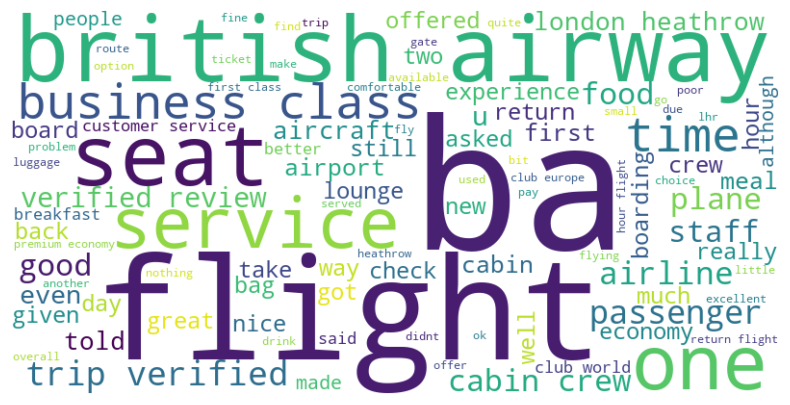

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the cleaned reviews into a single string
all_reviews = ' '.join(dataset['Cleaned_Reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
dataset

,Unnamed: 0,reviews,Cleaned_Reviews,Sentiment_Score,Sentiment
0,0,Not Verified | Only the second time flying BA ...,verified second time flying ba first time wasn...,0.8213,Positive
1,1,✅ Trip Verified | I wasn't going to bother rev...,trip verified wasnt going bother reviewing fli...,0.8568,Positive
2,2,✅ Trip Verified | I booked business class tic...,trip verified booked business class ticket fia...,-0.7151,Negative
3,3,✅ Trip Verified | I will never travel with Br...,trip verified never travel british airway spen...,-0.9670,Negative
4,4,✅ Trip Verified | I am already in Portugal so...,trip verified already portugal contacted today...,-0.3612,Negative
...,...,...,...,...,...
3539,3539,This was a bmi Regional operated flight on a R...,bmi regional operated flight rj manchester hea...,0.6174,Positive
3540,3540,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...,0.7650,Positive
3541,3541,My son who had worked for British Airways urge...,son worked british airway urged fly british ai...,0.7003,Positive
3542,3542,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon really nic...,0.8070,Positive


In [12]:
dataset.to_csv('Analyzed_Reviews_BA.csv', index=False)

# Topic Distribution Bar Chart

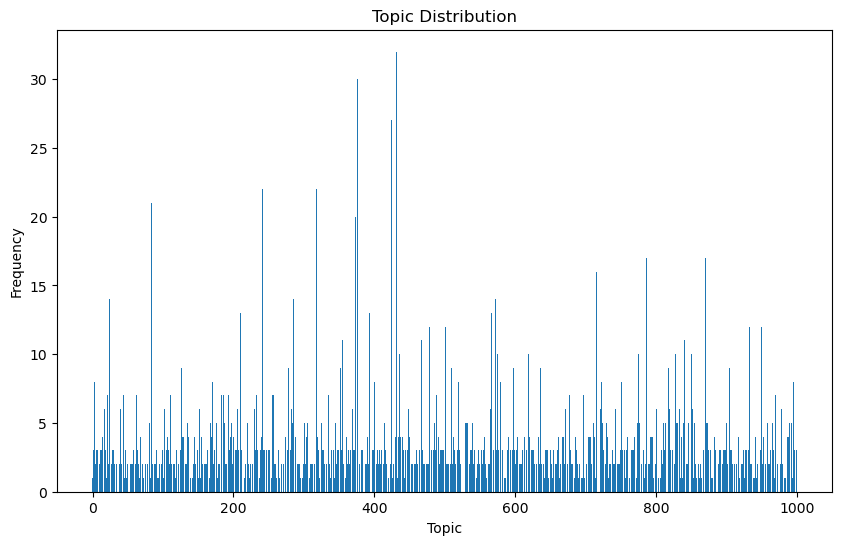

In [18]:
import numpy as np
from collections import Counter

# Calculate dominant topic for each document
dominant_topics = [np.argmax(doc_topics) for doc_topics in lda_model.transform(dtm)]

# Count the frequency of each topic
topic_counts = Counter(dominant_topics)

# Sort the topics by frequency
sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)

# Plot the topic distribution
plt.figure(figsize=(10, 6))
topics, counts = zip(*sorted_topics)
plt.bar(topics, counts)
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Topic Distribution')
plt.show()

# Topic Keyword Matrix

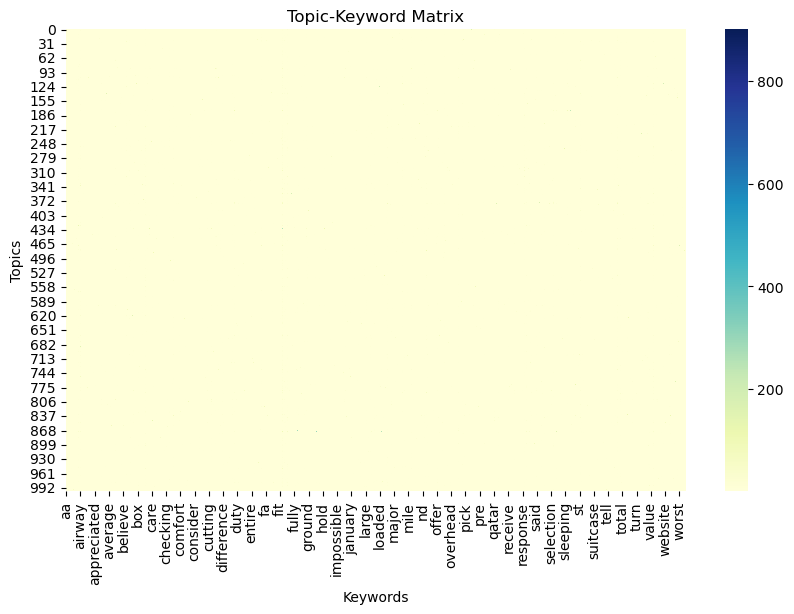

In [14]:
import seaborn as sns

# Create the topic-keyword matrix
topic_keywords = pd.DataFrame(lda_model.components_, columns=feature_names)

# Plot the topic-keyword matrix
plt.figure(figsize=(10, 6))
sns.heatmap(topic_keywords, cmap='YlGnBu')
plt.title('Topic-Keyword Matrix')
plt.xlabel('Keywords')
plt.ylabel('Topics')
plt.show()

# Sentiment Analysis of Reviews

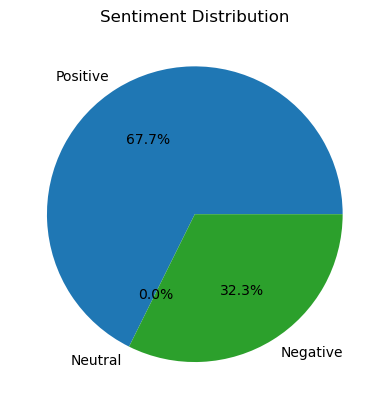

In [22]:
# Count the occurrences of each sentiment
sentiment_counts = dataset['Sentiment'].value_counts()

# Convert sentiment labels to numerical values
sentiment_labels = ['Positive', 'Neutral', 'Negative']
sentiment_values = [sentiment_counts.get(label, 0) for label in sentiment_labels]

# Plot the pie chart
plt.pie(sentiment_values, labels=sentiment_labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

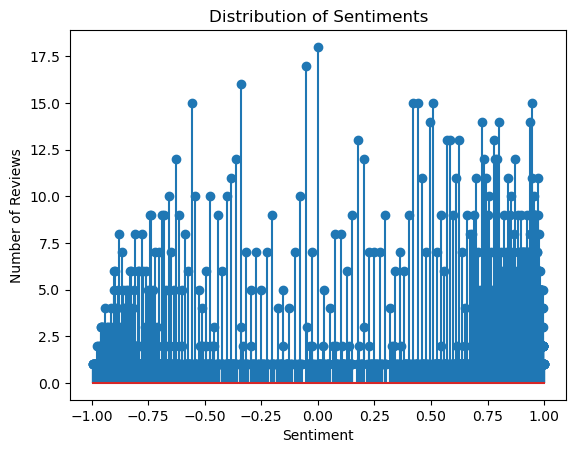

In [37]:
import matplotlib.pyplot as plt

# Count the number of reviews for each sentiment category
sentiment_counts = dataset['Sentiment_Score'].value_counts()

# Create a bar plot
plt.stem(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments')
plt.show()


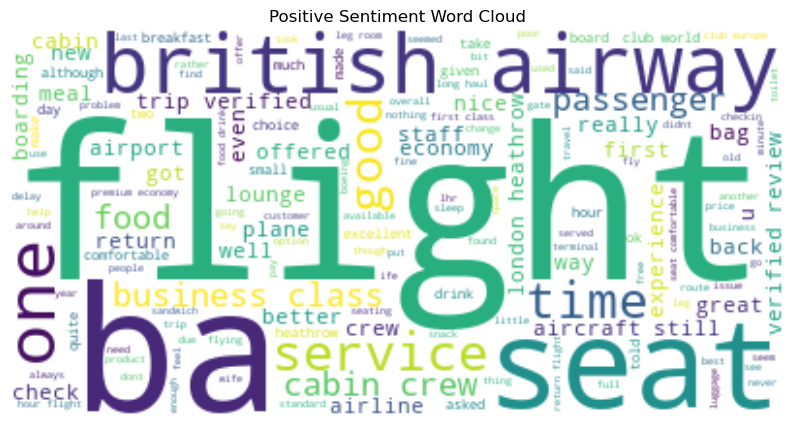

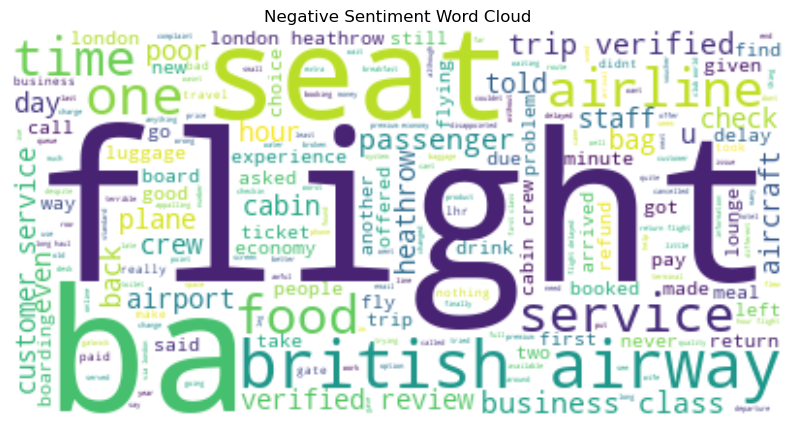

In [38]:
from wordcloud import WordCloud

# Combine the reviews for each sentiment category
positive_reviews = ' '.join(dataset.loc[dataset['Sentiment'] == 'Positive', 'Cleaned_Reviews'])
negative_reviews = ' '.join(dataset.loc[dataset['Sentiment'] == 'Negative', 'Cleaned_Reviews'])
neutral_reviews = ' '.join(dataset.loc[dataset['Sentiment'] == 'Neutral', 'Cleaned_Reviews'])

# Generate word cloud for positive sentiment
if len(positive_reviews) > 0:
    wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Positive Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

# Generate word cloud for negative sentiment
if len(negative_reviews) > 0:
    wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Negative Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

# Generate word cloud for neutral sentiment
if len(neutral_reviews) > 0:
    wordcloud_neutral = WordCloud(background_color='white').generate(neutral_reviews)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.title('Neutral Sentiment Word Cloud')
    plt.axis('off')
    plt.show()